In [81]:
import zipfile
import os

zip_path = r"C:\Users\orynb\.kaggle\food-delivery-dataset.zip"

extract_path = r"C:\Users\orynb\.kaggle\food_delivery_data"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Датасет распакован в:", extract_path)

Датасет распакован в: C:\Users\orynb\.kaggle\food_delivery_data


In [82]:
import pandas as pd

In [83]:
file_path = r"C:\Users\orynb\.kaggle\food_delivery_data\train.csv"

In [84]:
df = pd.read_csv(file_path)

In [85]:
df.info()
df.head()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [86]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df['Delivery_person_Ratings'] = (
    df['Delivery_person_Ratings']
    .astype(str)
    .str.replace(' ', '')
    .str.replace('NaN', '')
)
df['Delivery_person_Ratings'] = pd.to_numeric(df['Delivery_person_Ratings'], errors='coerce')
df['Delivery_person_Age'] = pd.to_numeric(df['Delivery_person_Age'], errors='coerce')
df['Time_taken(min)'] = df['Time_taken(min)'].str.extract(r'(\d+)')
df['Time_taken(min)'] = pd.to_numeric(df['Time_taken(min)'], errors='coerce')
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True, errors='coerce')
df['Weatherconditions'] = df['Weatherconditions'].str.replace('conditions ', '').str.strip()
df['Road_traffic_density'] = df['Road_traffic_density'].str.lower().str.strip()
df['Type_of_order'] = df['Type_of_order'].str.lower().str.strip()
df['Type_of_vehicle'] = df['Type_of_vehicle'].str.lower().str.strip()
df['City'] = df['City'].str.lower().str.strip()
df['Festival'] = df['Festival'].str.lower().str.strip()
df['multiple_deliveries'] = pd.to_numeric(df['multiple_deliveries'], errors='coerce')

print("Пропущенные значения:")
print(df.isnull().sum())
print("\nДубликаты:", df.duplicated().sum())
print("\nОписательная статистика:")
print(df.describe())


=== После очистки аномалий ===
       Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
count         39958.000000             39958.000000         39958.000000   
mean             29.554332                 4.634003            18.897525   
min              20.000000                 2.500000             9.957144   
25%              25.000000                 4.500000            12.986047   
50%              30.000000                 4.700000            19.065838   
75%              35.000000                 4.900000            22.751234   
max              39.000000                 5.000000            30.914057   
std               5.761347                 0.314920             5.463903   

       Restaurant_longitude  Delivery_location_latitude  \
count          39958.000000                39958.000000   
mean              76.909839                   18.961162   
min               72.768726                    9.967144   
25%               73.897902                   1

In [87]:
import numpy as np

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df['Order_hour'] = pd.to_datetime(df['Time_Orderd']).dt.hour

C:\Users\orynb\AppData\Local\Temp\ipykernel_46480\2097836284.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order_hour'] = pd.to_datetime(df['Time_Orderd']).dt.hour


In [90]:
df['Day_of_week'] = pd.to_datetime(df['Order_Date']).dt.day_name()

In [91]:
df['Weather_clean'] = df['Weatherconditions'].str.replace('conditions ', '')

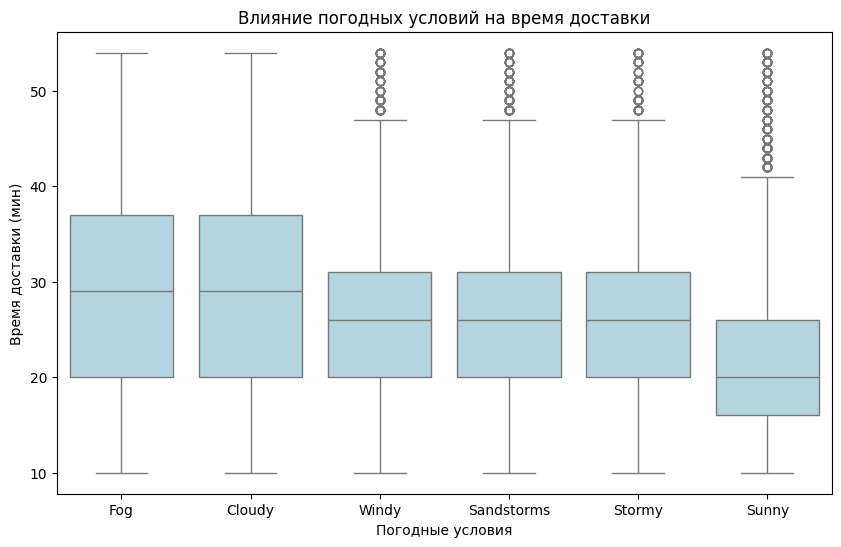

In [92]:
plt.figure(figsize=(10, 6))
weather_order = df.groupby('Weather_clean')['Time_taken(min)'].mean().sort_values(ascending=False).index
sns.boxplot(data=df, x='Weather_clean', y='Time_taken(min)', order=weather_order, color = 'lightblue')
plt.title('Влияние погодных условий на время доставки',)
plt.xlabel('Погодные условия')
plt.ylabel('Время доставки (мин)')
plt.show()

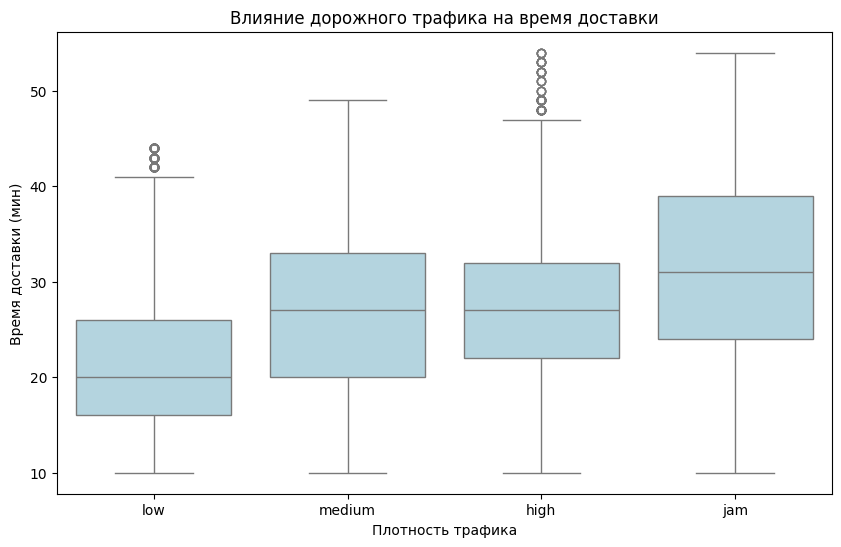

In [93]:
plt.figure(figsize=(10, 6))
traffic_order = ['low', 'medium', 'high', 'jam']
sns.boxplot(data=df, x='Road_traffic_density', y='Time_taken(min)', order=traffic_order, color = 'lightblue')
plt.title('Влияние дорожного трафика на время доставки',)
plt.xlabel('Плотность трафика',)
plt.ylabel('Время доставки (мин)',)
plt.show()

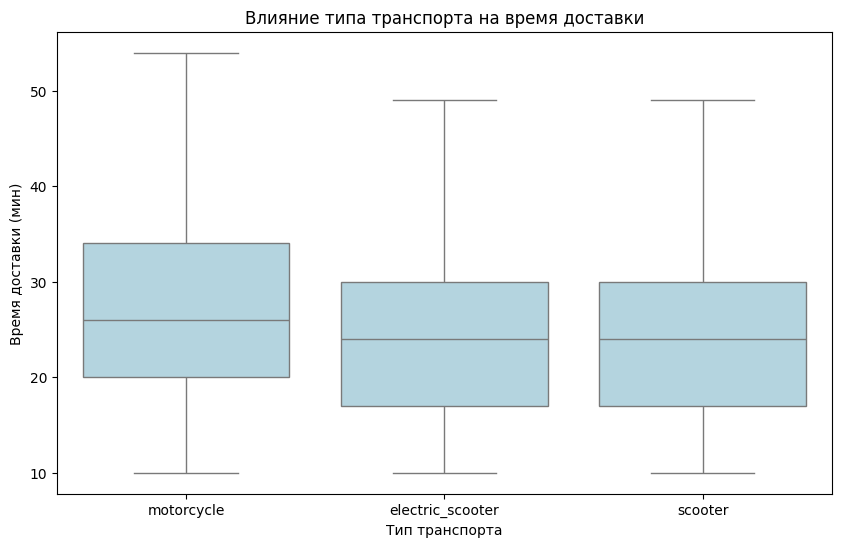

In [94]:
plt.figure(figsize=(10, 6))
vehicle_order = df.groupby('Type_of_vehicle')['Time_taken(min)'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='Type_of_vehicle', y='Time_taken(min)', order=vehicle_order, color = 'lightblue')
plt.title('Влияние типа транспорта на время доставки')
plt.xlabel('Тип транспорта')
plt.ylabel('Время доставки (мин)')
plt.show()

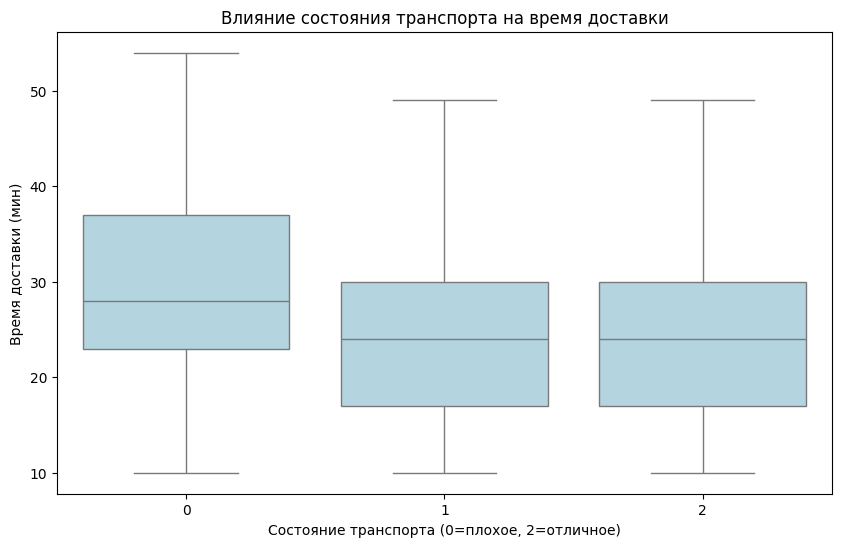

In [95]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Vehicle_condition', y='Time_taken(min)', color = 'lightblue')
plt.title('Влияние состояния транспорта на время доставки')
plt.xlabel('Состояние транспорта (0=плохое, 2=отличное)')
plt.ylabel('Время доставки (мин)')
plt.show()

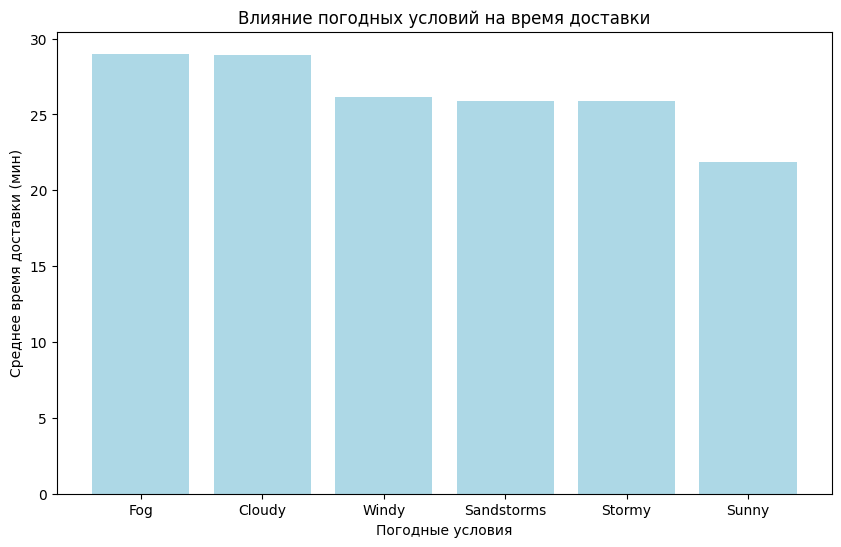

In [96]:
plt.figure(figsize=(10, 6))
weather_avg = df.groupby('Weather_clean')['Time_taken(min)'].mean().sort_values(ascending=False)
plt.bar(weather_avg.index, weather_avg.values, color = 'lightblue')
plt.title('Влияние погодных условий на время доставки')
plt.xlabel('Погодные условия')
plt.ylabel('Среднее время доставки (мин)')
plt.show()

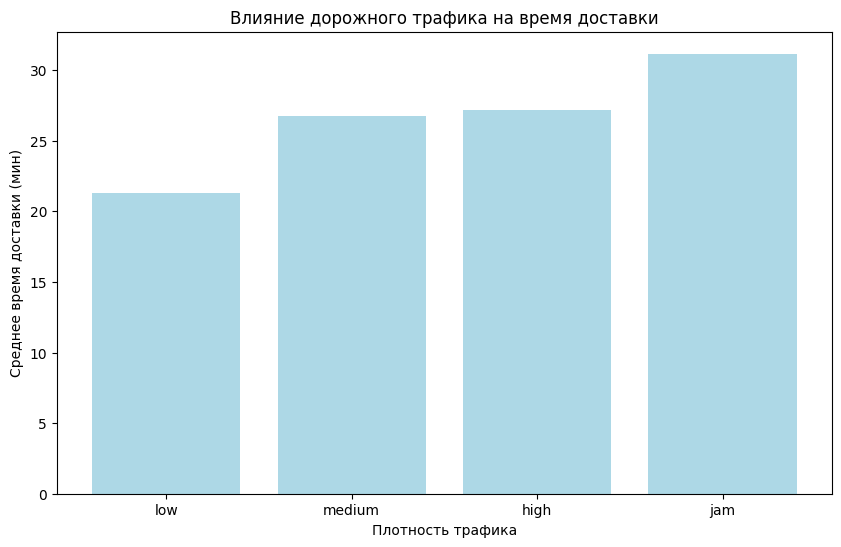

In [97]:
plt.figure(figsize=(10, 6))
traffic_order = ['low', 'medium', 'high', 'jam']
traffic_avg = df.groupby('Road_traffic_density')['Time_taken(min)'].mean()
traffic_avg = traffic_avg.reindex(traffic_order)
plt.bar(traffic_avg.index, traffic_avg.values, color = 'lightblue')
plt.title('Влияние дорожного трафика на время доставки',)
plt.xlabel('Плотность трафика')
plt.ylabel('Среднее время доставки (мин)')
plt.show() 

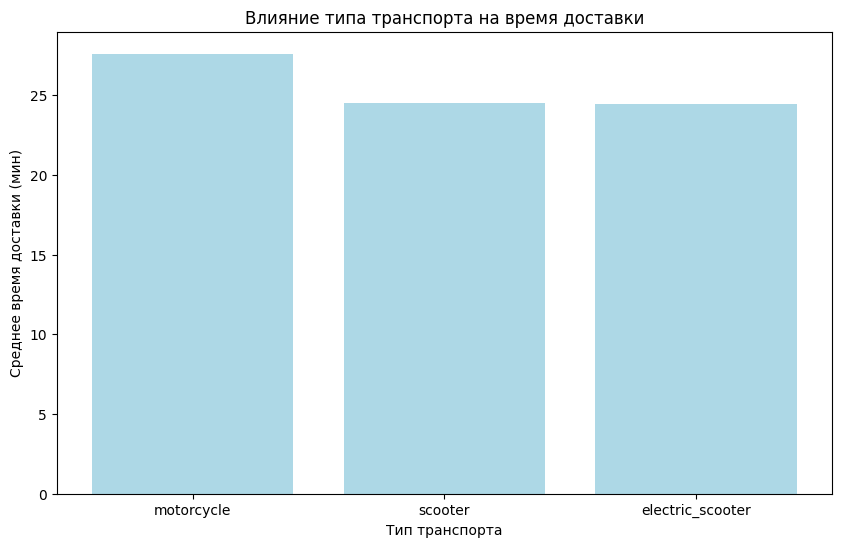

In [98]:
plt.figure(figsize=(10, 6))
vehicle_avg = df.groupby('Type_of_vehicle')['Time_taken(min)'].mean().sort_values(ascending=False)
plt.bar(vehicle_avg.index, vehicle_avg.values, color= 'lightblue')
plt.title('Влияние типа транспорта на время доставки')
plt.xlabel('Тип транспорта')
plt.ylabel('Среднее время доставки (мин)')
plt.show()

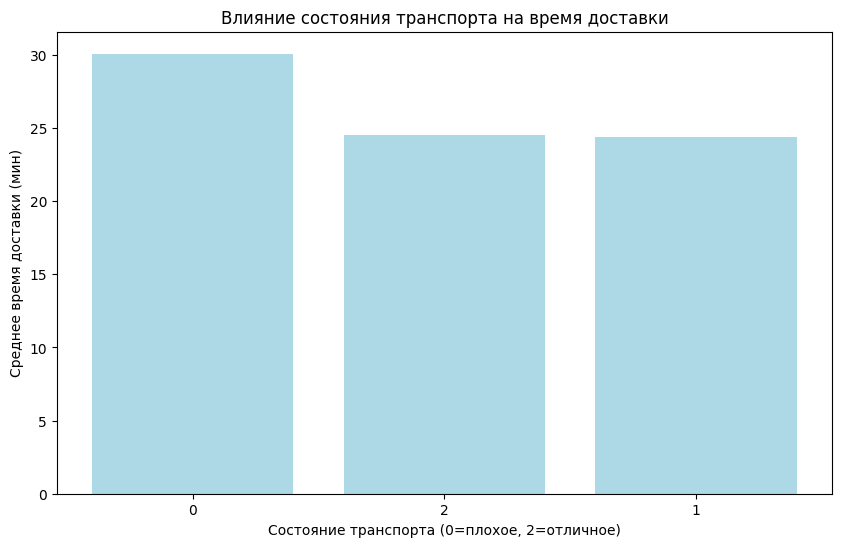

In [99]:
plt.figure(figsize=(10, 6))
condition_avg = df.groupby('Vehicle_condition')['Time_taken(min)'].mean().sort_values(ascending=False)
plt.bar(condition_avg.index.astype(str), condition_avg.values, color = 'lightblue')
plt.title('Влияние состояния транспорта на время доставки')
plt.xlabel('Состояние транспорта (0=плохое, 2=отличное)')
plt.ylabel('Среднее время доставки (мин)')
plt.show()

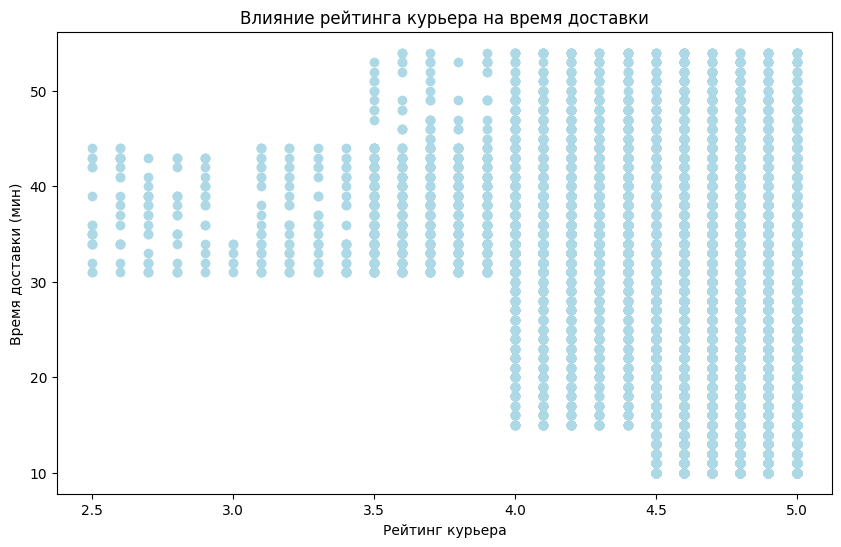

In [100]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Delivery_person_Ratings'], df['Time_taken(min)'],color='lightblue')
plt.xlabel('Рейтинг курьера')
plt.ylabel('Время доставки (мин)')
plt.title('Влияние рейтинга курьера на время доставки')
plt.show()

Text(0.5, 1.0, 'Влияние возраста курьера на время доставки')

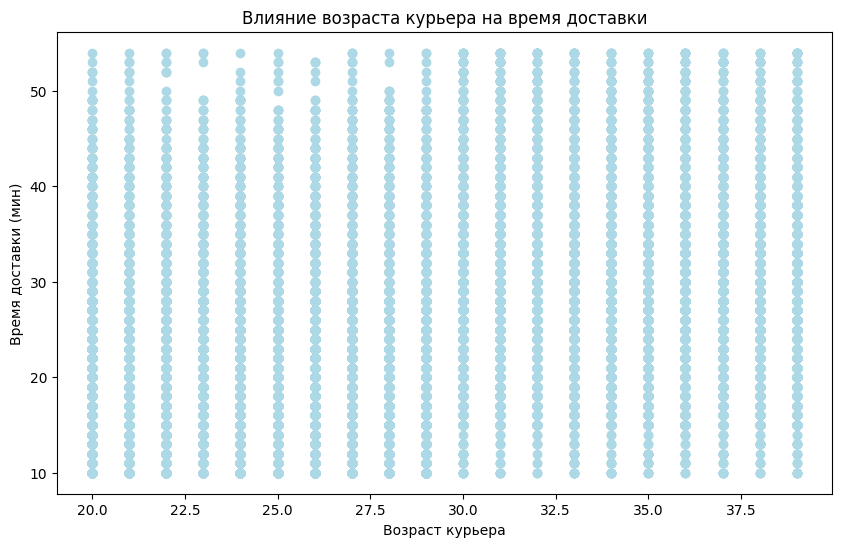

In [101]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Delivery_person_Age'], df['Time_taken(min)'], color='lightblue')
plt.xlabel('Возраст курьера')
plt.ylabel('Время доставки (мин)')
plt.title('Влияние возраста курьера на время доставки')

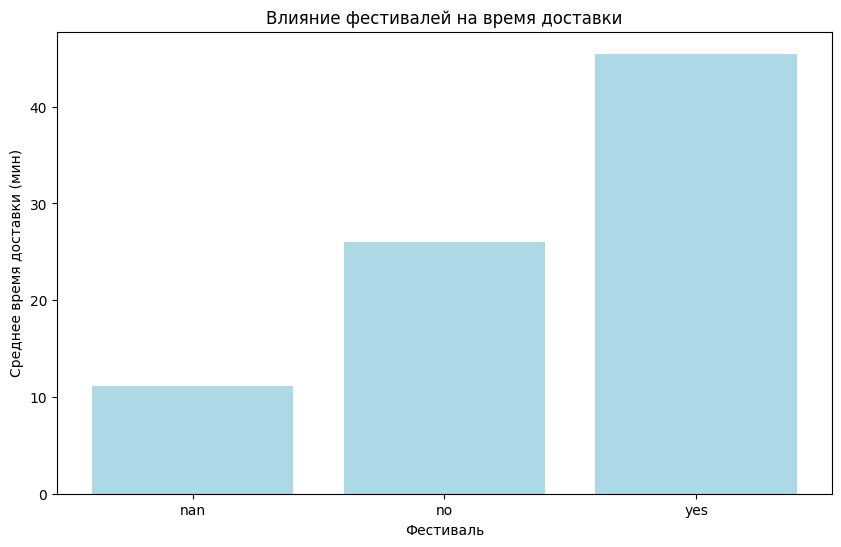

In [102]:
plt.figure(figsize=(10, 6))
festival_avg = df.groupby('Festival')['Time_taken(min)'].mean()
plt.bar(festival_avg.index, festival_avg.values, color= 'lightblue')
plt.title('Влияние фестивалей на время доставки')
plt.xlabel('Фестиваль')
plt.ylabel('Среднее время доставки (мин)')
plt.show()

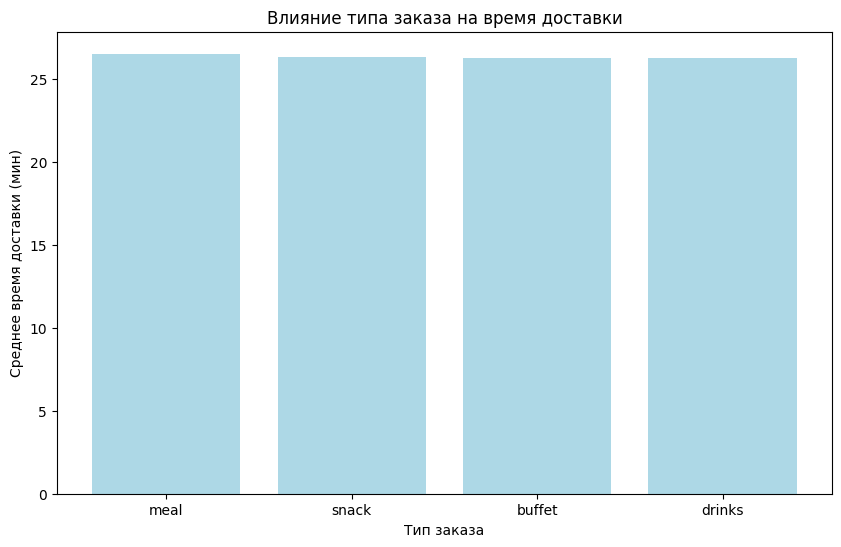

In [103]:
plt.figure(figsize=(10, 6))
order_avg = df.groupby('Type_of_order')['Time_taken(min)'].mean().sort_values(ascending=False)
plt.bar(order_avg.index, order_avg.values, color= 'lightblue')
plt.title('Влияние типа заказа на время доставки')
plt.xlabel('Тип заказа')
plt.ylabel('Среднее время доставки (мин)')
plt.show()